In [1]:
import pandas as pd
import numpy as np
import os

from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
def perform_metrics(y_truth, y_forecasted): 

    mae = round(mean_absolute_error(y_truth, y_forecasted) ,8)
    mape = round(np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100, 8)
    mse = round(mean_squared_error(y_truth, y_forecasted), 8)
    rmse = round(mse**(0.5), 8)
    rmspe = round((np.sqrt(np.mean(np.square((y_truth - y_forecasted) / y_truth)))) * 100, 8)
    r2 = round(r2_score(y_truth, y_forecasted), 8)
    try:
        corr, _ = pearsonr(y_truth, y_forecasted)
        pearson = round(corr, 8)
    except:
        pearson = None

    return mae, mape, mse, rmse, rmspe, r2, pearson

In [6]:
# file = 'test_lstm_1d_50_epochs.csv'
# file = 'test_lstm_1d_200_epochs.csv'
# file = 'test_lstm_1d_400_epochs.csv'
list_files = ['test_lstm_1d_50_epochs.csv','test_lstm_1d_100_epochs.csv', 'test_lstm_1d_150_epochs.csv', 'test_lstm_1d_200_epochs.csv', 
              'test_lstm_1d_250_epochs.csv', 'test_lstm_1d_300_epochs.csv', 'test_lstm_1d_350_epochs.csv', 'test_lstm_1d_400_epochs.csv']

for file in list_files:

    df_aux = pd.read_csv('/home/ricardo/Documentos/TCC_FILES/TCC/'+file, sep = '\t')

    mae, mape, mse, rmse, rmspe, r2, pearson = perform_metrics(df_aux['y_test'], df_aux['y_test_predict'])
    print('file', file)
    print('mape', mape, 'rmse', rmse, 'r2', r2)

file test_lstm_1d_50_epochs.csv
mape 4.66162511 rmse 546.07673667 r2 0.86995575
file test_lstm_1d_100_epochs.csv
mape 5.37213209 rmse 617.41926897 r2 0.8337567
file test_lstm_1d_150_epochs.csv
mape 3.64972665 rmse 445.40763257 r2 0.91348347
file test_lstm_1d_200_epochs.csv
mape 4.88278821 rmse 542.01540398 r2 0.87188291
file test_lstm_1d_250_epochs.csv
mape 3.82913931 rmse 471.18479216 r2 0.90317972
file test_lstm_1d_300_epochs.csv
mape 5.22126251 rmse 569.94876499 r2 0.85833733
file test_lstm_1d_350_epochs.csv
mape 3.29453651 rmse 417.46285666 r2 0.92399897
file test_lstm_1d_400_epochs.csv
mape 3.10772247 rmse 407.6693117 r2 0.92752306


In [ ]:
test_lstm_1d_50_epochs
mape 4.66162511 rmse 546.07673667 r2 0.86995575

test_lstm_1d_200_epochs
mape 4.88278821 rmse 542.01540398 r2 0.87188291

test_lstm_1d_400_epochs
mape 3.10772247 rmse 407.6693117 r2 0.92752306

In [6]:
list_files = os.listdir('datasets/train_test_remake')
list_files

['train_arima_1d.csv',
 'train_prophet_1d.csv',
 'train_ma_1h.csv',
 'test_lstm_1d.csv',
 'train_naive_1h.csv',
 'train_ses_1d.csv',
 'train_prophet_1h.csv',
 'train_ma_1d.csv',
 'train_lstm_1d.csv',
 'test_ses_1h.csv',
 'test_lstm_1h.csv',
 'train_arima_1h.csv',
 'test_naive_1d.csv',
 'train_ar_1d.csv',
 'train_lstm_1h.csv',
 'test_naive_1h.csv',
 'test_arima_1d.csv',
 'test_prophet_1h.csv',
 'test_ma_1h.csv',
 'test_ar_1h.csv',
 'test_ma_1d.csv',
 'test_ar_1d.csv',
 'train_ses_1h.csv',
 'test_prophet_1d.csv',
 'train_ar_1h.csv',
 'test_ses_1d.csv',
 'test_arima_1h.csv',
 'train_naive_1d.csv']

In [14]:
from sklearn.utils.validation import check_array

In [16]:
# best_params = {
#     'test_ma_1d.csv': {'p_order': 0, 'd_order': 1, 'q_order': 5},
#     'test_ma_1h.csv': {'p_order': 0, 'd_order': 1, 'q_order': 2},
#     'test_naive_1h.csv': {None},
#     'test_naive_1d.csv': {None},
#     'test_prophet_1h.csv': {'diff_order': 1},
#     'test_prophet_1d.csv': {'diff_order': 1},
#     'test_ses_1d.csv': {'alpha': 0.9},
#     'test_ses_1h.csv': {'alpha': 0.9},
#     'test_ar_1d.csv': {'p_order': 5, 'd_order': 1, 'q_order': 0},
#     'test_ar_1h.csv': {'p_order': 4, 'd_order': 1, 'q_order': 0},
#     'test_arima_1d.csv': {'p_order': 5, 'd_order': 0, 'q_order': 4},
#     'test_arima_1h.csv': {'p_order': 4, 'd_order': 1, 'q_order': 3},
#     'test_lstm_1d.csv': {'batch_size': 5, 'num_units': 50, 'epochs': 200},
#     'test_lstm_1h.csv': {'batch_size': 100, 'num_units': 100, 'epochs': 200},
# }

best_params = {
    'test_ma_1d.csv': {"ordem_p": 0, "ordem_d": 1, "ordem_q": 5},
    'test_ma_1h.csv': {"ordem_p": 0, "ordem_d": 1, "ordem_q": 2},
    'test_naive_1h.csv': {},
    'test_naive_1d.csv': {},
    'test_prophet_1h.csv': {"ordem_d": 1},
    'test_prophet_1d.csv': {"ordem_d": 1},
    'test_ses_1d.csv': {"alfa": 0.9},
    'test_ses_1h.csv': {"alfa": 0.9},
    'test_ar_1d.csv': {"ordem_p": 5, "ordem_d": 1, "ordem_q": 0},
    'test_ar_1h.csv': {"ordem_p": 4, "ordem_d": 1, "ordem_q": 0},
    'test_arima_1d.csv': {"ordem_p": 4, "ordem_d": 1, "ordem_q": 5},
    'test_arima_1h.csv': {"ordem_p": 4, "ordem_d": 1, "ordem_q": 3},
    'test_lstm_1d.csv': {"lote": 5, "unidades": 100, "ciclos": 400},
    'test_lstm_1h.csv': {"lote": 100, "unidades": 100, "ciclos": 200},
}

data = {
    'model': [],
    'periodicity': [],
    'best_params': [],
    'mae': [],
    'mape': [],
    'mse': [],
    'rmse': [],
    'rmspe': [],
    'r2': [],
    'pearson': []
}

list_files = os.listdir('datasets/train_test_remake')

for file in list_files:
    
    file_aux = file.split('_')
    
    if file_aux[0] == 'train': #test, train
        
        df_aux = pd.read_csv('datasets/train_test_remake/'+file, sep = '\t')
        #y_test, y_train
        #y_test_predict, y_train_predict
        # print(file)
        # print(df_aux.head())
        mae, mape, mse, rmse, rmspe, r2, pearson = perform_metrics(df_aux['y_train'], df_aux['y_train_predict'])
        if file == 'train_prophet_1h.csv':
            y_true, y_pred = np.array(df_aux['y_train']), np.array(df_aux['y_train_predict'])
            y_true = check_array(y_true.reshape(1, -1))
            y_pred = check_array(y_pred.reshape(1, -1))
            print(np.mean(np.abs((y_true - y_pred) / y_true)))
            # print(round(np.mean(np.abs((df_aux['y_train'] - df_aux['y_train_predict']) / df_aux['y_train'])) * 100))
        model = file_aux[1].upper()
        periodicity = file_aux[2].split('.')[0].upper()

        data['model'].append(model)
        data['periodicity'].append(periodicity)
        # data['best_params'].append(best_params[file])
        data['best_params'].append(None)
        data['mae'].append(mae)
        data['mape'].append(mape)
        data['mse'].append(mse)
        data['rmse'].append(rmse)
        data['rmspe'].append(rmspe)
        data['r2'].append(r2)
        data['pearson'].append(pearson)
        
df_metrics = pd.DataFrame(data).sort_values(by=['model']).reset_index(drop = True)

inf


/tmp/ipykernel_4942/1094261611.py:66: RuntimeWarning: divide by zero encountered in true_divide
  print(np.mean(np.abs((y_true - y_pred) / y_true)))


<AxesSubplot:>

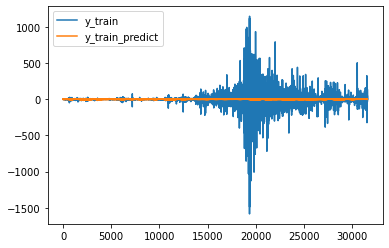

In [26]:
pd.read_csv('datasets/train_test_remake/'+'train_prophet_1h.csv', sep = '\t').plot()

In [17]:
df_metrics = df_metrics.sort_values(by=['rmse']).reset_index(drop = True)
a = df_metrics[df_metrics['periodicity'] == '1H'].copy()
a.columns = ['Modelo', 'Periodicidade', 'Melhores parametros', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'R²', 'Pearson']
a = a.drop(columns = ['MAE', 'MSE', 'RMSPE', 'Pearson'])
a = a.drop(columns = ['Melhores parametros', 'Periodicidade'])
# a = a.drop(columns = ['MAPE', 'RMSE', 'R²', 'Periodicidade'])
a.round(4)

,Modelo,MAPE,RMSE,R²
0,ARIMA,0.4905,66.2537,0.9997
1,AR,0.4844,66.5128,0.9997
2,MA,0.4842,66.5248,0.9997
3,PROPHET,inf,66.6094,0.0013
4,NAIVE,0.4818,66.6538,0.9997
5,SES,0.4814,66.6845,0.9997
6,LSTM,0.7441,71.0544,0.9996
